In [0]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


import pyspark.sql.functions as f
import pyspark.sql.types as t
from pyspark.sql.functions import isnan, when, count, col

from pyspark.sql import Window
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [0]:
data = spark.read.option("header", "true").parquet(f"dbfs:/mnt/mids-w261/team20SSDK/final_datasets/data_range/part-00*.parquet")

print(data.count())
print(len(data.columns))
display(data)

24603731
89

YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS,ORIGIN_TZ,DEST_TZ,DEP_MIN,DEP_HOUR,ARR_MIN,ARR_HOUR,ORIGIN_TS,ORIGIN_UTC,DEST_TS,DEST_UTC,ORIGIN_FLIGHT_COUNT,DEST_FLIGHT_COUNT,ORIGIN_STATION,ORIGIN_STATION_NAME,PAGERANK,DEST_STATION,DEST_STATION_NAME,ORIGIN_UTC_ADJ_MIN,ORIGIN_UTC_ADJ_MAX,ORIGIN_MAX_DATE,DEST_MAX_DATE,AVG_WND_SPEED_ORIGIN,MIN_CIG_HEIGHT_ORIGIN,MIN_VIS_DIS_ORIGIN,AVG_TMP_DEG_ORIGIN,AVG_DEW_DEG_ORIGIN,AVG_SLP_ORIGIN,AVG_WND_SPEED_DEST,MIN_CIG_HEIGHT_DEST,MIN_VIS_DIS_DEST,AVG_TMP_DEG_DEST,AVG_DEW_DEG_DEST,AVG_SLP_DEST
2015,3,7,19,7,2015-07-19,AS,19930,AS,N763AS,50,14709,1470903,30073,SCC,"Deadhorse, AK",AK,2,Alaska,1,10754,1075403,30107,BRW,"Barrow, AK",AK,2,Alaska,1,1720,1716,-4.0,0.0,0.0,-1,1700-1759,3.0,1719,1755,3.0,1807,1758,-9.0,0.0,0.0,-1,1800-1859,0.0,0.0,47.0,42.0,36.0,1.0,204.0,1,0,America/Anchorage,America/Anchorage,20,17,7,18,2015-07-19T17:20:00.000+0000,2015-07-20T01:20:00.000+0000,2015-07-19T18:07:00.000+0000,2015-07-20T02:07:00.000+0000,4,4,70063727406,DEADHORSE AIRPORT,7.414563004725428E-4,70026027502,W POST-WILL ROGERS MEMORIAL A,2015-07-17T23:20:00.000+0000,2015-07-19T23:20:00.000+0000,2015-07-19T22:53:00.000+0000,2015-07-19T22:53:00.000+0000,51.0,488,16093,111.0,72.0,10173.0,31.0,244,16093,50.0,28.0,10174.0
2015,4,10,28,3,2015-10-28,AS,19930,AS,N563AS,55,14709,1470903,30073,SCC,"Deadhorse, AK",AK,2,Alaska,1,10754,1075403,30107,BRW,"Barrow, AK",AK,2,Alaska,1,1014,1023,9.0,9.0,0.0,0,1000-1059,17.0,1040,1121,5.0,1103,1126,23.0,23.0,1.0,1,1100-1159,0.0,0.0,49.0,63.0,41.0,1.0,204.0,1,0,America/Anchorage,America/Anchorage,14,10,3,11,2015-10-28T10:14:00.000+0000,2015-10-28T18:14:00.000+0000,2015-10-28T11:03:00.000+0000,2015-10-28T19:03:00.000+0000,6,6,70063727406,DEADHORSE AIRPORT,7.414563004725428E-4,70026027502,W POST-WILL ROGERS MEMORIAL A,2015-10-26T16:14:00.000+0000,2015-10-28T16:14:00.000+0000,2015-10-28T15:53:00.000+0000,2015-10-28T15:53:00.000+0000,82.0,396,16093,-78.0,-100.0,10161.0,41.0,305,12875,-122.0,-139.0,10190.0
2016,1,1,19,2,2016-01-19,AS,19930,AS,N765AS,51,10299,1029904,30299,ANC,"Anchorage, AK",AK,2,Alaska,1,10754,1075403,30107,BRW,"Barrow, AK",AK,2,Alaska,1,1740,1737,-3.0,0.0,0.0,-1,1700-1759,12.0,1749,1933,7.0,1935,1940,5.0,5.0,0.0,0,1900-1959,0.0,0.0,115.0,123.0,104.0,1.0,725.0,3,0,America/Anchorage,America/Anchorage,40,17,35,19,2016-01-19T17:40:00.000+0000,2016-01-20T02:40:00.000+0000,2016-01-19T19:35:00.000+0000,2016-01-20T04:35:00.000+0000,78,6,70273026451,TED STEVENS ANCHORAGE INTL,0.007067025665998423,70026027502,W POST-WILL ROGERS MEMORIAL A,2016-01-18T00:40:00.000+0000,2016-01-20T00:40:00.000+0000,2016-01-19T23:53:00.000+0000,2016-01-19T23:53:00.000+0000,25.6,22000,14484,-28.6,-82.4,9990.0,51.0,61,1609,-194.0,-217.0,10329.0
2016,1,1,19,2,2016-01-19,AS,19930,AS,N762AS,50,14709,1470903,30073,SCC,"Deadhorse, AK",AK,2,Alaska,1,10754,1075403,30107,BRW,"Barrow, AK",AK,2,Alaska,1,1727,1703,-24.0,0.0,0.0,-2,1700-1759,5.0,1708,1746,6.0,1820,1752,-28.0,0.0,0.0,-2,1800-1859,0.0,0.0,53.0,49.0,38.0,1.0,204.0,1,0,America/Anchorage,America/Anchorage,27,17,20,18,2016-01-19T17:27:00.000+0000,2016-01-20T02:27:00.000+0000,2016-01-19T18:20:00.000+0000,2016-01-20T03:20:00.000+0000,6,6,70063727406,DEADHORSE AIRPORT,7.414563004725428E-4,70026027502,W POST-WILL ROGERS MEMORIAL A,2016-01-18T00:27:00.000+0000,2016-01-20T00:27:

In [0]:
data_pd = data.toPandas()

In [0]:
data_6 = data.where(col("YEAR") == 2015) \
             .where((col("ORIGIN") == "ORD") | (col("ORIGIN") == "ATL")) \
             .where(col("MONTH").isin([1,2,3,4,5,6]))

In [0]:
data_6_pd = data_6.toPandas()

In [0]:
carrier_count = data_pd["OP_UNIQUE_CARRIER"].value_counts()
carriers = list(carrier_count.index)
car_count = list(carrier_count)
carrier_count = pd.DataFrame({"carrier": carriers, "count":car_count})

In [0]:
fig = px.bar(carrier_count, x='carrier', y='count',
             hover_data=['carrier', 'count'], color='carrier',
             labels={'pop':'Number of Flights '}, height=400)
fig.show()

In [0]:
origin_counts = data_pd["DEP_DEL15"].value_counts()
units = list(origin_counts.index)
org_count = list(origin_counts)
origin_count_pd = pd.DataFrame({"DEP_DEL15": units, "count":org_count})

In [0]:
fig = px.bar(origin_count_pd, x='DEP_DEL15', y='count',
             hover_data=['DEP_DEL15', 'count'], color='count',
             labels={'pop':'Number of Flights by DEP_DEL15 '}, height=400)
fig.show()

In [0]:
delays = (4444482/(4444482+20159249))*100
on_time = (20159249/(4444482+20159249))*100

print("Percent Delays: {0}%".format(delays))
print("Percent OnTime: {0}%".format(on_time))

Percent Delays: 18.064260253861498%
Percent OnTime: 81.93573974613851%

In [0]:
origin_state_count = data_pd["ORIGIN_STATE_ABR"].value_counts()
states = list(origin_state_count.index)
org_count = list(origin_state_count)
origin_state_count = pd.DataFrame({"states": states, "count":org_count})

In [0]:
fig = px.bar(origin_state_count, x='states', y='count',
             hover_data=['states', 'count'], color='states',
             labels={'pop':'Number of Flights Origin By State '}, height=400)
fig.show()

In [0]:
origin_counts = data_pd["YEAR"].value_counts()
units = list(origin_counts.index)
org_count = list(origin_counts)
origin_count_pd = pd.DataFrame({"year": units, "count":org_count})

In [0]:
fig = px.bar(origin_count_pd, x='year', y='count',
             hover_data=['year', 'count'], color='count',
             labels={'pop':'Number of Flights by Year '}, height=400)
fig.show()

In [0]:
origin_counts = data_pd["MONTH"].value_counts()
units = list(origin_counts.index)
org_count = list(origin_counts)
origin_count_pd = pd.DataFrame({"month": units, "count":org_count})

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-3796979802820478> in <module> 
 ----> 1 origin_counts = data_pd [ "MONTH" ] . value_counts ( ) 
 2 units = list ( origin_counts . index ) 
 3 org_count = list ( origin_counts ) 
 4 origin_count_pd = pd . DataFrame ( { "month" : units , "count" : org_count } ) 

 NameError : name 'data_pd' is not defined

In [0]:
fig = px.bar(origin_count_pd, x='month', y='count',
             hover_data=['month', 'count'], color='count',
             labels={'pop':'Number of Flights by Month '}, height=400)
fig.show()

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-3796979802820476> in <module> 
 ----> 1 fig = px.bar(origin_count_pd, x='month', y='count',
 2 hover_data = [ 'month' , 'count' ] , color = 'count' , 
 3 labels={'pop':'Number of Flights by Month '}, height=400)
 4 fig . show ( ) 

 NameError : name 'px' is not defined

In [0]:
origin_counts = data_pd["DAY_OF_MONTH"].value_counts()
units = list(origin_counts.index)
org_count = list(origin_counts)
origin_count_pd = pd.DataFrame({"day_of_month": units, "count":org_count})

In [0]:
fig = px.bar(origin_count_pd, x='day_of_month', y='count',
             hover_data=['day_of_month', 'count'], color='count',
             labels={'pop':'Number of Flights by DAY_OF_MONTH '}, height=400)
fig.show()

In [0]:
data_pd.head()

Out[42]:

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS,ORIGIN_TZ,DEST_TZ,DEP_MIN,DEP_HOUR,ARR_MIN,ARR_HOUR,ORIGIN_TS,ORIGIN_UTC,DEST_TS,DEST_UTC,ORIGIN_FLIGHT_COUNT,DEST_FLIGHT_COUNT,ORIGIN_STATION,ORIGIN_STATION_NAME,PAGERANK,DEST_STATION,DEST_STATION_NAME,ORIGIN_UTC_ADJ_MIN,ORIGIN_UTC_ADJ_MAX,ORIGIN_MAX_DATE,DEST_MAX_DATE,AVG_WND_SPEED_ORIGIN,MIN_CIG_HEIGHT_ORIGIN,MIN_VIS_DIS_ORIGIN,AVG_TMP_DEG_ORIGIN,AVG_DEW_DEG_ORIGIN,AVG_SLP_ORIGIN,AVG_WND_SPEED_DEST,MIN_CIG_HEIGHT_DEST,MIN_VIS_DIS_DEST,AVG_TMP_DEG_DEST,AVG_DEW_DEG_DEST,AVG_SLP_DEST,ORIGIN_UTC_HOUR
0,2015,3,7,19,7,2015-07-19,AS,19930,AS,N763AS,50,14709,1470903,30073,SCC,"Deadhorse, AK",AK,2,Alaska,1,10754,1075403,30107,BRW,"Barrow, AK",AK,2,Alaska,1,1720,1716,-4.0,0.0,0.0,-1,1700-1759,3.0,1719,1755,3.0,...,42.0,36.0,1.0,204.0,1,0.0,America/Anchorage,America/Anchorage,20,17,7,18,2015-07-19 17:20:00,2015-07-20 01:20:00,2015-07-19 18:07:00,2015-07-20 02:07:00,4,4,70063727406,DEADHORSE AIRPORT,0.000741,70026027502,W POST-WILL ROGERS MEMORIAL A,2015-07-17 23:20:00,2015-07-19 23:20:00,2015-07-19 22:53:00,2015-07-19 22:53:00,51.0,488.0,16093.0,111.0,72.00,10173.00,31.0,244.0,16093.0,50.0,28.0,10174.0,1
1,2015,4,10,28,3,2015-10-28,AS,19930,AS,N563AS,55,14709,1470903,30073,SCC,"Deadhorse, AK",AK,2,Alaska,1,10754,1075403,30107,BRW,"Barrow, AK",AK,2,Alaska,1,1014,1023,9.0,9.0,0.0,0,1000-1059,17.0,1040,1121,5.0,...,63.0,41.0,1.0,204.0,1,0.0,America/Anchorage,America/Anchorage,14,10,3,11,2015-10-28 10:14:00,2015-10-28 18:14:00,2015-10-28 11:03:00,2015-10-28 19:03:00,6,6,70063727406,DEADHORSE AIRPORT,0.000741,70026027502,W POST-WILL ROGERS MEMORIAL A,2015-10-26 16:14:00,2015-10-28 16:14:00,2015-10-28 15:53:00,2015-10-28 15:53:00,82.0,396.0,16093.0,-78.0,-100.00,10161.00,41.0,305.0,12875.0,-122.0,-139.0,10190.0,18
2,2016,1,1,19,2,2016-01-19,AS,19930,AS,N765AS,51,10299,1029904,30299,ANC,"Anchorage, AK",AK,2,Alaska,1,10754,1075403,30107,BRW,"Barrow, AK",AK,2,Alaska,1,1740,1737,-3.0,0.0,0.0,-1,1700-1759,12.0,1749,1933,7.0,...,123.0,104.0,1.0,725.0,3,0.0,America/Anchorage,America/Anchorage,40,17,35,19,2016-01-19 17:40:00,2016-01-20 02:40:00,2016-01-19 19:35:00,2016-01-20 04:35:00,78,6,70273026451,TED STEVENS ANCHORAGE INTL,0.007067,70026027502,W POST-WILL ROGERS MEMORIAL A,2016-01-18 00:40:00,2016-01-20 00:40:00,2016-01-19 23:53:00,2016-01-19 23:53:00,25.6,22000.0,14484.0,-28.6,-82.40,9990.00,51.0,61.0,1609.0,-194.0,-217.0,10329.0,2
3,2016,1,1,19,2,2016-01-19,AS,19930,AS,N762AS,50,14709,1470903,30073,SCC,"Deadhorse, AK",AK,2,Alaska,1,10754,1075403,30107,BRW,"Barrow, AK",AK,2,Alaska,1,1727,1703,-24.0,0.0,0.0,-2,1700-1759,5.0,1708,1746,6.0,...,49.0,38.0,1.0,204.0,1,0.0,America/Anchorage,America/Anchorage,27,17,20,18,2016-01-19 17:27:00,2016-01-20 02:27:00,2016-01-19 18:20:00,2016-01-20 03:20:00,6,6,70063727406,DEADHORSE AIRPORT,0.000741,70026027502,W POST-WILL ROGERS MEMORIAL A,2016-01-18 00:27:00,2016-01-20 00:27:00,2016-01-19 23:53:00,2016-01-19 23:53:00,46.0,22000.0,9656.0,-333.0,-372.00,10307.00,51.0,61.0,1609.0,-194.0,-217.0,10329.0,2
4,2016,4,11,21,1,2016-11-21,AS,19930,AS,N768AS,51,10299,1029904,30299,ANC,"Anchorage, AK",AK,2,Alaska,1,10754,1075403,30107,BRW,"Barrow, AK",AK,2,Alaska,1,1715,1709,-6.0,0.0,0.0,-1,1700-1759,11.0,1720,1901,5.0,...,117.0,101.0,1.0,725.0,3,0.0,America/Anchorage,America/Anchorage,15,17,16,19,2016-11-21 17:15:00,2016-11-22 02:15:00,2016-11-21 19:16:00,2016-11-22 04:16:00,77,6,70273026451,TED STEVENS ANCHORAGE

In [0]:
origin_counts = data_pd["DAY_OF_WEEK"].value_counts()
units = list(origin_counts.index)
org_count = list(origin_counts)
origin_count_pd = pd.DataFrame({"day_of_week": units, "count":org_count})

In [0]:
fig = px.bar(origin_count_pd, x='day_of_week', y='count',
             hover_data=['day_of_week', 'count'], color='count',
             labels={'pop':'Number of Flights by DAY_OF_WEEK '}, height=400)
fig.show()

In [0]:
origin_counts = data_pd["DEP_HOUR"].value_counts()
units = list(origin_counts.index)
org_count = list(origin_counts)
origin_count_pd = pd.DataFrame({"dep_hour": units, "count":org_count})

In [0]:
fig = px.bar(origin_count_pd, x='dep_hour', y='count',
             hover_data=['dep_hour', 'count'], color='count',
             labels={'pop':'Number of Flights by DEP_HOUR '}, height=400)
fig.show()

In [0]:
data_pd["ORIGIN_UTC_HOUR"] = [x.hour for x in data_pd["ORIGIN_UTC"]]

In [0]:
origin_counts = data_pd["ORIGIN_UTC_HOUR"].value_counts()
units = list(origin_counts.index)
org_count = list(origin_counts)
origin_count_pd = pd.DataFrame({"ORIGIN_UTC_HOUR": units, "count":org_count})

fig = px.bar(origin_count_pd, x='ORIGIN_UTC_HOUR', y='count',
             hover_data=['ORIGIN_UTC_HOUR', 'count'], color='count',
             labels={'pop':'Number of Flights by ORIGIN_UTC_HOUR '}, height=400)
fig.show()

In [0]:
origin_counts = data_pd["DEP_DELAY_GROUP"].value_counts()
units = list(origin_counts.index)
org_count = list(origin_counts)
origin_count_pd = pd.DataFrame({"DEP_DELAY_GROUP": units, "count":org_count})

fig = px.bar(origin_count_pd, x='DEP_DELAY_GROUP', y='count',
             hover_data=['DEP_DELAY_GROUP', 'count'], color='DEP_DELAY_GROUP',
             labels={'pop':'Number of Flights by DEP_DELAY_GROUP '}, height=400)
fig.show()

In [0]:
airport_meta = spark.read.option("header", "true").parquet(f"dbfs:/mnt/mids-w261/team20SSDK/cleaned_data/station/airport_meta/part-00000*.parquet")
print(airport_meta.count())
display(airport_meta)

369

ICAO,IATA,usaf,wban,name,country,state,lat,lon,elev,begin,end,STATION,station_tz,pagerank
KBGM,BGM,725150,04725,GREATER BINGHAMTON/E A LINK F,US,NY,42.207,-75.98,+0486.2,19730101,20190305,72515004725,America/New_York,5.098670768151906E-4
PADL,DLG,703210,25513,DILLINGHAM AIRPORT,US,AK,59.05,-158.517,+0026.2,20060101,20190304,70321025513,America/Anchorage,4.3527736882491297E-4
KINL,INL,727470,14918,FALLS INTERNATIONAL AIRPORT,US,MN,48.561,-93.398,+0360.6,19730101,20190304,72747014918,America/Chicago,5.756469008355182E-4
TJPS,PSE,785203,00398,MERCEDITA AIRPORT,RQ,null,18,-66.55,+0009.1,19960101,20180831,78520300398,America/Puerto_Rico,4.93588543990075E-4
KMSY,MSY,722310,12916,LOUIS ARMSTRONG NEW ORLEANS I,US,LA,29.997,-90.278,+0001.2,19451001,20190304,72231012916,America/Chicago,0.006101332284257424
NSTU,PPG,917650,61705,TAFUNA/PAGO PAGO INTERNATIONA,AQ,AS,-14.331,-170.714,+0003.7,19450801,20190303,91765061705,Pacific/Pago_Pago,4.2332677149787575E-4
KGEG,GEG,727850,24157,SPOKANE INTERNATIONAL AIRPORT,US,WA,47.622,-117.528,+0717.2,19410811,20190304,72785024157,America/Los_Angeles,0.0018193681991335517
KDRT,DRT,722610,22010,DEL RIO INTERNATIONAL AIRPORT,US,TX,29.378,-100.927,+0304.5,19510501,20190304,72261022010,America/Chicago,4.303347791618013E-4
KSNA,SNA,722977,93184,J. WAYNE APT-ORANGE CO APT,US,CA,33.68,-117.866,+0016.5,19400617,20190304,72297793184,America/Los_Angeles,0.005312944808992356
KBUR,BUR,722880,23152,BURBANK-GLENDALE-PASA ARPT,US,CA,34.201,-118.358,+0236.2,19430601,20190304,72288023152,America/Los_Angeles,0.0032225439583463684


In [0]:
airport_meta_pd = airport_meta.toPandas()

In [0]:
fig = px.histogram(airport_meta_pd , x="pagerank", nbins=100)
fig.show()

In [0]:
airlines = spark.read.option("header", "true").parquet(f"dbfs:/mnt/mids-w261/team20SSDK/cleaned_data/airlines/airlines_final/part-00*.parquet")
print(airlines.count())
airlines_pd = airlines.toPandas()

31171199

In [0]:
origin_counts = airlines_pd["YEAR"].value_counts()
units = list(origin_counts.index)
org_count = list(origin_counts)
origin_count_pd = pd.DataFrame({"year": units, "count":org_count})

In [0]:
fig = px.bar(origin_count_pd, x='year', y='count',
             hover_data=['year', 'count'], color='count',
             labels={'pop':'Number of Flights by Year '}, height=400)
fig.show()

In [0]:
np.array(data_pd.columns)

Out[10]: array(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
 'FL_DATE', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID',
 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
 'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST',
 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_FIPS',
 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME',
 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW',
 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED',
 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'DIV_AIRPORT_LANDINGS',
 'ORIGIN_TZ', 'DEST_TZ', 'DEP_MIN', 'DEP_HOUR', 'ARR_MIN',
 'ARR_HOUR', 'ORIGIN_TS', 'ORIGIN_UTC', 'DEST_TS', 'DEST_UTC',
 'ORIGIN_FLIGHT_COUNT', 'DEST_FLIGHT_COUNT', 'ORIGIN_STATION',
 'ORIGIN_STATION_NAME', 'PAGERANK', 'DEST_STATION',
 'DEST_STATION_NAME', 'ORIGIN_UTC_ADJ_MIN', 'ORIGIN_UTC_ADJ_MAX',
 'ORIGIN_MAX_DATE', 'DEST_MAX_DATE', 'AVG_WND_SPEED_ORIGIN',
 'MIN_CIG_HEIGHT_ORIGIN', 'MIN_VIS_DIS_ORIGIN',
 'AVG_TMP_DEG_ORIGIN', 'AVG_DEW_DEG_ORIGIN', 'AVG_SLP_ORIGIN',
 'AVG_WND_SPEED_DEST', 'MIN_CIG_HEIGHT_DEST', 'MIN_VIS_DIS_DEST',
 'AVG_TMP_DEG_DEST', 'AVG_DEW_DEG_DEST', 'AVG_SLP_DEST'],
 dtype=object)

In [0]:
carrier_count = data_pd["ORIGIN"].value_counts()
carriers = list(carrier_count.index)
car_count = list(carrier_count)
carrier_count = pd.DataFrame({"ORIGIN": carriers, "count":car_count})

In [0]:
fig = px.bar(carrier_count, x='ORIGIN', y='count',
             hover_data=['ORIGIN', 'count'], color='ORIGIN',
             labels={'pop':'Number of ORIGIN '}, height=400)
fig.show()

In [0]:
num_cols = ['DISTANCE', 'CRS_ELAPSED_TIME','ORIGIN_FLIGHT_COUNT', 'DEST_FLIGHT_COUNT', 'PAGERANK',
            'AVG_WND_SPEED_ORIGIN', 'MIN_CIG_HEIGHT_ORIGIN',
            'MIN_VIS_DIS_ORIGIN', 'AVG_TMP_DEG_ORIGIN', 'AVG_DEW_DEG_ORIGIN',
            'AVG_SLP_ORIGIN', 'AVG_WND_SPEED_DEST', 'MIN_CIG_HEIGHT_DEST',
            'MIN_VIS_DIS_DEST', 'AVG_TMP_DEG_DEST', 'AVG_DEW_DEG_DEST',
            'AVG_SLP_DEST']

In [0]:
pr_to_del = data_pd.loc[:,num_cols]
pr_to_del.head()

Out[27]:

,DISTANCE,CRS_ELAPSED_TIME,ORIGIN_FLIGHT_COUNT,DEST_FLIGHT_COUNT,PAGERANK,AVG_WND_SPEED_ORIGIN,MIN_CIG_HEIGHT_ORIGIN,MIN_VIS_DIS_ORIGIN,AVG_TMP_DEG_ORIGIN,AVG_DEW_DEG_ORIGIN,AVG_SLP_ORIGIN,AVG_WND_SPEED_DEST,MIN_CIG_HEIGHT_DEST,MIN_VIS_DIS_DEST,AVG_TMP_DEG_DEST,AVG_DEW_DEG_DEST,AVG_SLP_DEST,DEP_DEL15
0,204.0,47.0,4,4,0.000741,51.0,488.0,16093.0,111.0,72.00,10173.00,31.0,244.0,16093.0,50.0,28.0,10174.0,0.0
1,204.0,49.0,6,6,0.000741,82.0,396.0,16093.0,-78.0,-100.00,10161.00,41.0,305.0,12875.0,-122.0,-139.0,10190.0,0.0
2,725.0,115.0,78,6,0.007067,25.6,22000.0,14484.0,-28.6,-82.40,9990.00,51.0,61.0,1609.0,-194.0,-217.0,10329.0,0.0
3,204.0,53.0,6,6,0.000741,46.0,22000.0,9656.0,-333.0,-372.00,10307.00,51.0,61.0,1609.0,-194.0,-217.0,10329.0,0.0
4,725.0,121.0,77,6,0.007067,31.0,3048.0,14484.0,-25.0,-95.25,10020.75,31.0,2743.0,16093.0,-72.0,-94.0,10158.0,0.0


In [0]:
corrMatrix = pr_to_del.corr()


print(corrMatrix)

DISTANCE CRS_ELAPSED_TIME ... AVG_SLP_DEST DEP_DEL15
DISTANCE 1.000000 0.983448 ... -0.023912 0.017592
CRS_ELAPSED_TIME 0.983448 1.000000 ... -0.019225 0.019547
ORIGIN_FLIGHT_COUNT 0.061466 0.059187 ... 0.001558 0.029298
DEST_FLIGHT_COUNT 0.061752 0.099014 ... -0.000025 -0.015517
PAGERANK 0.054095 0.050132 ... 0.007803 0.024835
AVG_WND_SPEED_ORIGIN -0.013009 -0.008376 ... -0.064315 0.093181
MIN_CIG_HEIGHT_ORIGIN 0.044793 0.017162 ... 0.016802 -0.048144
MIN_VIS_DIS_ORIGIN 0.045051 0.029153 ... -0.001893 -0.050267
AVG_TMP_DEG_ORIGIN 0.018957 -0.013690 ... -0.270323 0.044428
AVG_DEW_DEG_ORIGIN 0.007376 -0.010614 ... -0.246576 0.022164
AVG_SLP_ORIGIN -0.029690 -0.011706 ... 0.535282 -0.041698
AVG_WND_SPEED_DEST -0.017961 -0.017774 ... -0.222058 0.086593
MIN_CIG_HEIGHT_DEST 0.054282 0.052901 ... 0.048426 -0.035939
MIN_VIS_DIS_DEST 0.057925 0.050736 ... 0.068478 -0.032254
AVG_TMP_DEG_DEST 0.022738 0.009413 ... -0.361139 0.043688
AVG_DEW_DEG_DEST 0.008556 -0.004490 ... -0.291951 0.016689
AVG_SLP_DEST -0.023912 -0.019225 ... 1.000000 -0.037856
DEP_DEL15 0.017592 0.019547 ... -0.037856 1.000000

[18 rows x 18 columns]

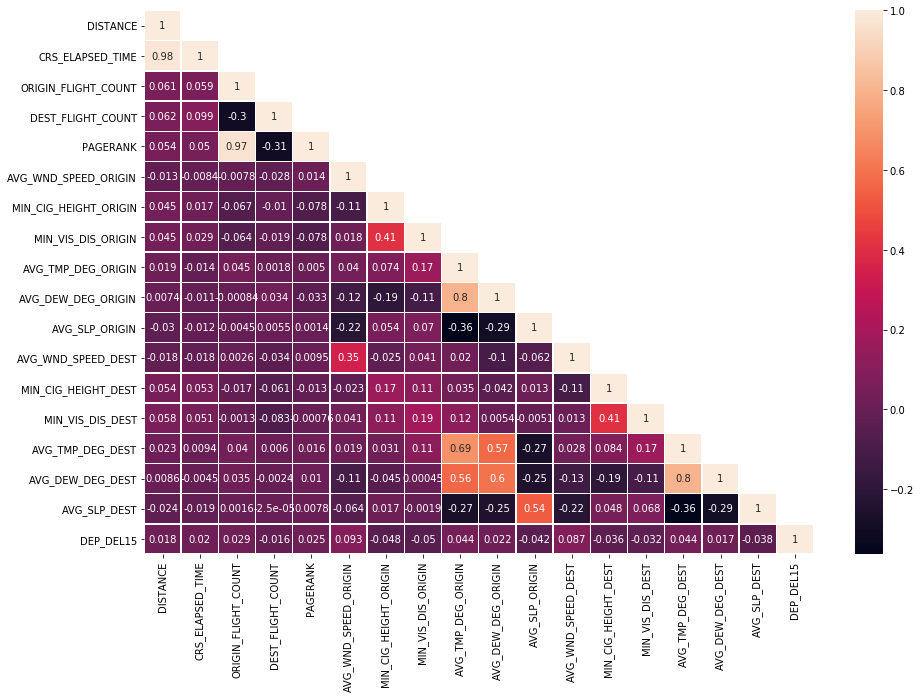

In [0]:
import seaborn as sn
import matplotlib.pyplot as plt

df_lt = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))

fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sn.heatmap(df_lt, annot=True, linewidths=.5, ax=ax)
plt.show()